In [4]:
import pandas as pd
import requests
import xlwings as xw
import matplotlib.pyplot as plt
import numpy as np

# Download Data and Clean Data
year_list = ['2021']
month_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
cleaned_data = []

for year in year_list:
	for month in month_list:
		url = f'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=csv&date={year}{month}01&stockNo=2330'
		res = requests.get(url)
		data = res.text

		for da in data.split('\n'):    
			if len(da.split('","')) == 9:        
				cleaned_data.append([ele.replace('",\r','').replace('"','') for ele in da.split('","')])

df = pd.DataFrame(cleaned_data[1:], columns = cleaned_data[0]).drop_duplicates(ignore_index = True)
df = df[(df.日期 != '日期')]
df = df.reset_index(drop = True)

# Convert Data Type
df['date'] = df['日期']
for i in range(len(df['date'])):
    df['date'].iloc[i] = df['date'].iloc[i].replace(df['date'].iloc[i][0:3], str(int(df['date'].iloc[i][0:3]) + 1911))

df['date'] = pd.to_datetime(df['date'], format = '%Y/%m/%d')

df['opening'] = df['開盤價'].astype(float)
df['highest'] = df['最高價'].astype(float) 
df['lowest'] = df['最低價'].astype(float)
df['closing'] = df['收盤價'].astype(float)

df.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,date,opening,highest,lowest,closing
0,110/01/04,"39,489,959","21,127,581,248",530.00,540.00,528.00,536.00,+6.00,"33,316",2021-01-04,530.0,540.0,528.0,536.0
1,110/01/05,"34,839,391","18,761,831,567",536.00,542.00,535.00,542.00,+6.00,"28,512",2021-01-05,536.0,542.0,535.0,542.0
2,110/01/06,"55,614,434","30,572,783,229",555.00,555.00,541.00,549.00,+7.00,"55,462",2021-01-06,555.0,555.0,541.0,549.0
3,110/01/07,"53,392,763","30,018,630,685",554.00,570.00,553.00,565.00,+16.00,"47,905",2021-01-07,554.0,570.0,553.0,565.0
4,110/01/08,"62,957,148","36,339,702,855",580.00,580.00,571.00,580.00,+15.00,"56,426",2021-01-08,580.0,580.0,571.0,580.0


In [5]:
# Function of Moving Average
def num_MA(df, num):
    n_ma = str(num) + 'MA'

    df[n_ma] = df['closing'].astype(float)

    df[n_ma][0:num-1] = np.NaN

    for i in range(num-1, len(df['closing'])):
        df[n_ma][i] = 0
        for j in range(i-(num-1), i+1):
            df[n_ma][i] = df[n_ma][i] + df['closing'][j]
        df[n_ma][i] = df[n_ma][i] / num

num_MA(df, 5)
num_MA(df, 10)
num_MA(df, 30)

df.head(10)

<ipython-input-5-d8747a51bd76>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[n_ma][0:num-1] = np.NaN
<ipython-input-5-d8747a51bd76>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[n_ma][i] = 0
<ipython-input-5-d8747a51bd76>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[n_ma][i] = df[n_ma][i] + df['closing'][j]
<ipython-input-5-d8747a51bd76>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,date,opening,highest,lowest,closing,5MA,10MA,30MA
0,110/01/04,"39,489,959","21,127,581,248",530.00,540.00,528.00,536.00,+6.00,"33,316",2021-01-04,530.0,540.0,528.0,536.0,NaN,NaN,NaN
1,110/01/05,"34,839,391","18,761,831,567",536.00,542.00,535.00,542.00,+6.00,"28,512",2021-01-05,536.0,542.0,535.0,542.0,NaN,NaN,NaN
2,110/01/06,"55,614,434","30,572,783,229",555.00,555.00,541.00,549.00,+7.00,"55,462",2021-01-06,555.0,555.0,541.0,549.0,NaN,NaN,NaN
3,110/01/07,"53,392,763","30,018,630,685",554.00,570.00,553.00,565.00,+16.00,"47,905",2021-01-07,554.0,570.0,553.0,565.0,NaN,NaN,NaN
4,110/01/08,"62,957,148","36,339,702,855",580.00,580.00,571.00,580.00,+15.00,"56,426",2021-01-08,580.0,580.0,571.0,580.0,554.4,NaN,NaN
5,110/01/11,"52,771,778","30,535,694,908",577.00,584.00,574.00,584.00,+4.00,"49,539",2021-01-11,577.0,584.0,574.0,584.0,564.0,NaN,NaN
6,110/01/12,"52,605,212","30,958,142,918",583.00,597.00,582.00,591.00,+7.00,"59,595",2021-01-12,583.0,597.0,582.0,591.0,573.8,NaN,NaN
7,110/01/13,"75,707,681","45,419,255,149",595.00,605.00,593.00,605.00,+14.00,"59,966",2021-01-13,595.0,605.0,593.0,605.0,585.0,NaN,NaN
8,110/01/14,"90,309,708","53,477,747,672",587.00,597.00,587.00,592.00,-13.00,"111,849",2021-01-14,587.0,597.0,587.0,592.0,590.4,NaN,NaN
9,110/01/15,"100,998,199","61,876,473,170",621.00,625.00,601.00,601.00,+9.00,"105,961",2021-01-15,621.0,625.0,601.0,601.0,594.6,574.5,NaN


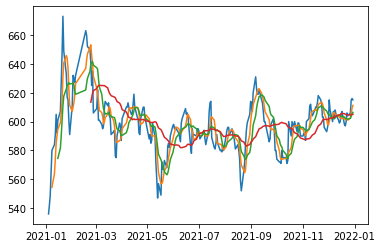

In [6]:
fig, ax = plt.subplots()

ax.plot(df['date'], df['closing'])
ax.plot(df['date'], df['5MA'])
ax.plot(df['date'], df['10MA'])
ax.plot(df['date'], df['30MA'])

plt.show()